# Probabilidade e Estatística - Atividade 2

<img src="Arquivos/pe.jpg"  width=80%>

In [214]:
# importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import statistics as std
import math

In [215]:
df = pd.read_csv("Populacao360.csv", sep = ';')
df = df.drop(['Unnamed: 8'], axis = 1)
df.IMC = df.IMC.apply(lambda x: x.replace(',','.'))
df.IMC = df.IMC.astype(float)

In [216]:
# ver os valores iniciais
df.head()

,nº,sexo,idade,peso,altura,IES,IMC,Clas IMC
0,1,F,19,52,167,UFAC,18.6,ad
1,2,F,20,78,177,UFAC,24.9,ad
2,3,F,22,56,172,UFAC,18.9,ad
3,4,F,19,45,165,UFAC,16.5,mg
4,5,F,18,60,160,UFAC,23.4,ad


### 1 - Para as variáveis SEXO e IES, obter o número absoluto e a frequência relativa percentual.

In [217]:
# número absoluto
df.sexo.value_counts()

M    184
F    176
Name: sexo, dtype: int64

Há 184 homens e 176 mulheres

In [218]:
# número absoluto
df.IES.value_counts()

UFSCAR    220
UFAC      140
Name: IES, dtype: int64

Há 220 estudantes da UFSCAR e 140 da UFAC

In [219]:
# frequência relativa em porcentagem
df.sexo.value_counts()/df.shape[0] * 100

M    51.111111
F    48.888889
Name: sexo, dtype: float64

Homens representam aproximadamente 51.1% do dataset, enquanto as mulheres representam 48.8%

In [220]:
# frequência relativa em porcentagem
df.IES.value_counts()/df.shape[0] * 100

UFSCAR    61.111111
UFAC      38.888889
Name: IES, dtype: float64

Estudantes da UFSCAR representam aproximadamente 61.1% do dataset, enquanto estudantes da UFAC 38.8% 

### 2 - Obter os Box-plot para as variáveis quantitativas (IDADE, PESO, ALTURA e IMC) separadamente (um para cada variável já que elas têm diferentes unidades de medidas. Interpretar os box-plot baseando-se na presença ou não de “outliers” (dados discrepantes), nos tamanhos das hastes, na posição relativa da mediana dentro da caixa (box) e outras características que considerar importante.

### IDADE

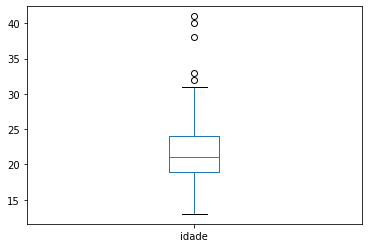

In [221]:
# boxplot para idade
fig, ax = plt.subplots()
df.idade.plot(kind = 'box');
plt.show()

In [222]:
# obter valores descritivos
df.idade.describe()

count    360.000000
mean      21.644444
std        3.884291
min       13.000000
25%       19.000000
50%       21.000000
75%       24.000000
max       41.000000
Name: idade, dtype: float64

In [223]:
# identificar o iqr da variável idade
q1_idade = df.idade.quantile(.25)
q3_idade = df.idade.quantile(.75)
IQR_idade = q3_idade - q1_idade
print('IQR da variável price: ', IQR_idade)

# definir os limites superiores e inferiores                                      
sup_idade = q3_idade + 1.5 * IQR_idade
inf_idade = q1_idade - 1.5 * IQR_idade

print('Limite superior de idade: ', sup_idade)
print('Limite inferior de idade: ', inf_idade)

IQR da variável price:  5.0
Limite superior de idade:  31.5
Limite inferior de idade:  11.5


Com o boxplot para a varíavel idade podemos observar que a mediana está em 21. Ao calcular a média, obtemos 21.6, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 13, enquanto o máximo, identificado pela haste superior é 41. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 31.5 anos, contudo, não podemos descartar essas informações porque são relevantes. Observando o contexto (alunos do ensino superior), também seria necessário verificar idades abaixo de 17 anos para garantir que os valores estão realmente verdadeiros e não irão atrapalhar a análise. O primeiro quartil (25%) está em 19 anos, já o terceiro quartil (75%) está em 24 anos. Isso significa que 75% dos indivíduos coletados tem mais de 19 anos, e 25% dos indivíduos coletados tem mais de 24 anos.

### PESO

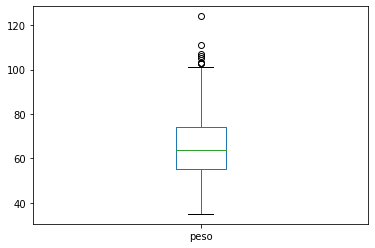

In [224]:
# boxplot para peso
fig, ax = plt.subplots()
df.peso.plot(kind = 'box');
plt.show()

In [225]:
# ver valores descritivos
df.peso.describe()

count    360.000000
mean      66.066667
std       15.047594
min       35.000000
25%       55.000000
50%       64.000000
75%       74.000000
max      124.000000
Name: peso, dtype: float64

In [226]:
# identificar o iqr da variável peso
q1_peso = df.peso.quantile(.25)
q3_peso = df.peso.quantile(.75)
IQR_peso = q3_peso - q1_peso
print('IQR da variável price: ', IQR_peso)

# definir os limites superiores e inferiores                                      
sup_peso = q3_peso + 1.5 * IQR_peso
inf_peso = q1_peso - 1.5 * IQR_peso

print('Limite superior de peso: ', sup_peso)
print('Limite inferior de peso: ', inf_peso)

IQR da variável price:  19.0
Limite superior de peso:  102.5
Limite inferior de peso:  26.5


Com o boxplot para a varíavel peso podemos observar que a mediana está em 64 kg. Ao calcular a média, obtemos 66 kg, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 35, enquanto o máximo, identificado pela haste superior é 124. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 102.5 kg, contudo, não podemos descartar essas informações porque são relevantes. O primeiro quartil (25%) do boxplot é 55 kg, o que nos indica que 75% dos usuários possuem kg maior ou igual a esse valor. O terceiro quartil (75%) nos indica 74kg, o que nos indica que 25% dos usuários possuem mais que esse valor.

A variável peso pode ter características que são relacionados ao genero, portanto irei plotar também dois boxplots, um que se refere ao peso para o sexo feminino e outro para o peso do sexo masculino.

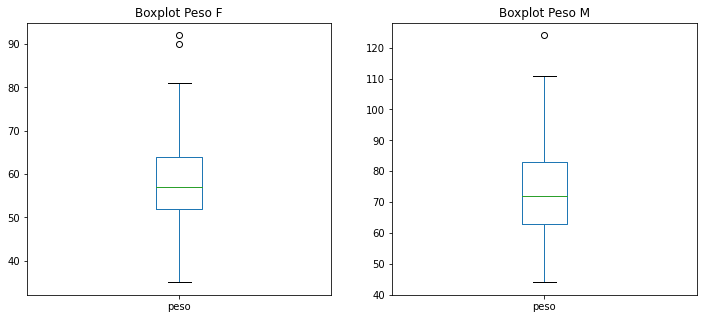

In [227]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Boxplot Peso F")
ax2.set_title("Boxplot Peso M")
df.peso.loc[df.sexo == 'F'].plot(kind = 'box', ax = ax1)
df.peso.loc[df.sexo == 'M'].plot(kind = 'box', ax = ax2);
plt.show()

Com os dados separados por sexo, podemos perceber que a mediana do peso para mulheres ficou abaixo de 60, enquanto para os homens acima de 70. Além disso, foram alterados os valores mínimos e máximos, os quartis, e consequentemente a quantidade de outliers.

### ALTURA

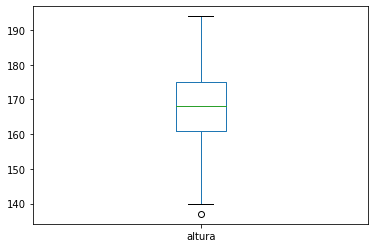

In [228]:
# boxplot para altura
fig, ax = plt.subplots()
df.altura.plot(kind = 'box');
plt.show()

In [229]:
# ver valores descritivos
df.altura.describe()

count    360.00000
mean     168.15000
std        9.57828
min      137.00000
25%      161.00000
50%      168.00000
75%      175.00000
max      194.00000
Name: altura, dtype: float64

Com o boxplot para a varíavel altura, vemos que a mediana é 168 cm. Ao calcular a média, obtemos 168.15 cm, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 137 cm, enquanto o máximo, identificado pela haste superior é 194 cm. Ao verificar o gráfico, não há presença de outliers. Ademais, p primeiro quartil (25%) é 161 cm, ou seja, 75% dos usuários possuem mais ou igual a 161 cm. O terceiro quartil (75%) é 175 cm, ou seja, 25% dos usuários possuem mais ou igual a 175 cm.

A variável altura também pode ser afetada de acordo com o sexo, portanto irei plotar 2 boxplots que fazem essa serparação para observarmos os resultados.

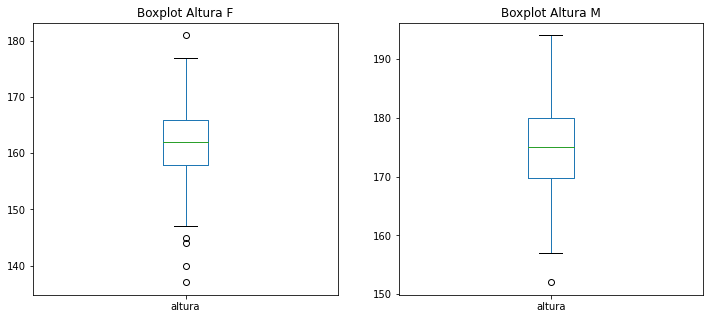

In [230]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Boxplot Altura F")
ax2.set_title("Boxplot Altura M")
df.altura.loc[df.sexo == 'F'].plot(kind = 'box', ax = ax1)
df.altura.loc[df.sexo == 'M'].plot(kind = 'box', ax = ax2);
plt.show()

Podemos perceber que ao fazer essa diferenciação, surgem a presença de outliers, que precisam ser analisados mais profundamente.

### IMC

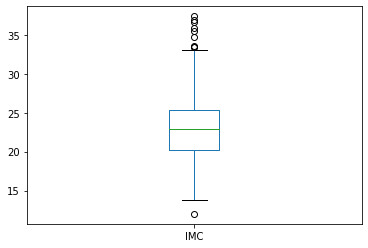

In [231]:
# boxplot para IMC
fig, ax = plt.subplots()
df.IMC.plot(kind = 'box');
plt.show()

In [232]:
# ver valores descritivos
df.IMC.describe()

count    360.000000
mean      23.241389
std        4.457035
min       12.000000
25%       20.175000
50%       22.850000
75%       25.400000
max       37.400000
Name: IMC, dtype: float64

In [233]:
# identificar o iqr da variável IMC
q1_IMC = df.IMC.quantile(.25)
q3_IMC = df.IMC.quantile(.75)
IQR_IMC = q3_IMC - q1_IMC
print('IQR da variável price: ', IQR_IMC)

# definir os limites superiores e inferiores                                      
sup_IMC = q3_IMC + 1.5 * IQR_IMC
inf_IMC = q1_IMC - 1.5 * IQR_IMC

print('Limite superior de IMC: ', sup_IMC)
print('Limite inferior de IMC: ', inf_IMC)

IQR da variável price:  5.224999999999998
Limite superior de IMC:  33.2375
Limite inferior de IMC:  12.337500000000004


Com o boxplot para a varíavel IMC podemos observar que a mediana está em 22.85. Ao calcular a média, obtemos 23.24, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 12, enquanto o máximo, identificado pela haste superior é 37.4. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 33.23. O primeiro quartil está em 20.175, e o terceiro em 25.40. Podemos verificar que a maior parte dos dados se encontra na faixa saudável que é definida da seguinte maneira:


            Resultado	|Situação
        Abaixo de 17	|Muito abaixo do peso
        Entre 17 e 18,49|Abaixo do peso
     Entre 18,50 e 24,99|Peso normal
    Entre 25 e 29,99	|Acima do peso
    Entre 30 e 34,99	|Obesidade I
    Entre 35 e 39,99	|Obesidade II (severa)
            Acima de 40	|Obesidade III (mórbida)
            
Os outliers, portanto, são importantes para a análise em questão.

Essa variável também pode ser afetada pelo sexo, então irei plotar dois boxplots para observamos.


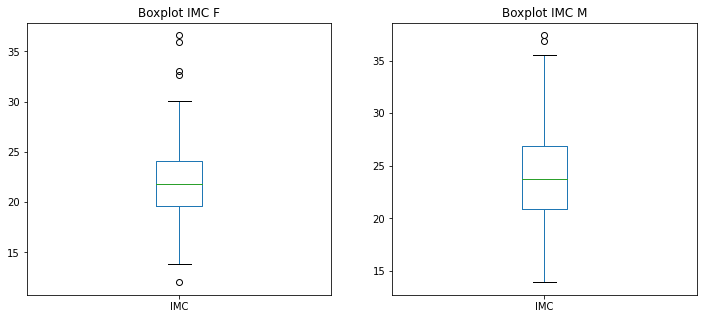

In [234]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Boxplot IMC F")
ax2.set_title("Boxplot IMC M")
df.IMC.loc[df.sexo == 'F'].plot(kind = 'box', ax = ax1)
df.IMC.loc[df.sexo == 'M'].plot(kind = 'box', ax = ax2);
plt.show()

## (3) Fazer o histograma para os dados quantitativos e comparar os resultados destes histogramas com os box-plots.

De acordo com a regra de Sturges, teríamos
k = 1 + 3.322 * log (360) = 9.5 = 10 classes

### IDADE

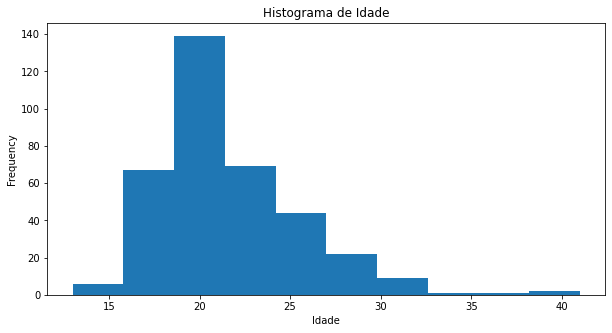

In [235]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Idade")
ax.set_title("Histograma de Idade")
df.idade.plot(kind = 'hist', ax = ax, bins = 10);

O histograma da variável idade está coerente com o seu boxplot. Podemos observar que há uma maior frequência nas idades iniciais. Onde 50% dos usuários tem menos de 21 anos. O que seria considerado como um outlier são os as idades maiores que 31.5, que possuem uma frequência menor.

### PESO

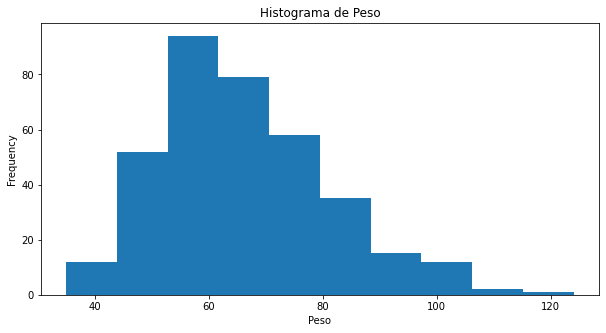

In [236]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Peso")
ax.set_title("Histograma de Peso")
df.peso.plot(kind = 'hist', ax = ax, bins = 10);

O histograma da variável peso também reflete as informações do boxplot. A mediana é 64 kg, e valores acima de 102.5 são considerados outliers pois possuem uma frequência menor. Iremos observar também os histogramas dos pesos separados por sexo.

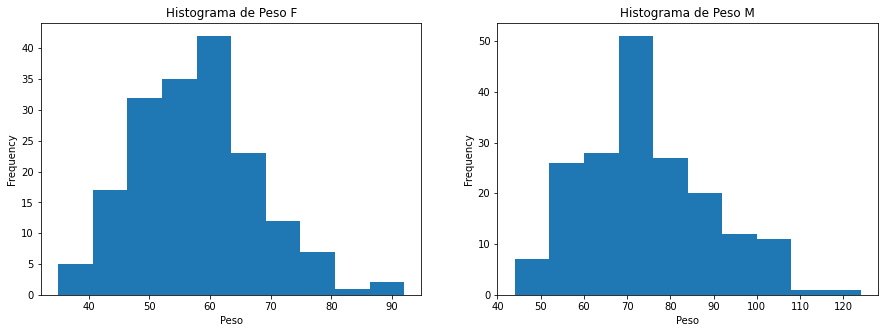

In [237]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_xlabel("Peso")
ax2.set_xlabel("Peso")
ax1.set_title("Histograma de Peso F")
ax2.set_title("Histograma de Peso M")
df.peso.loc[df.sexo == 'F'].plot(kind = 'hist', ax = ax1, bins = 10);
df.peso.loc[df.sexo == 'M'].plot(kind = 'hist', ax = ax2, bins = 10);

### ALTURA

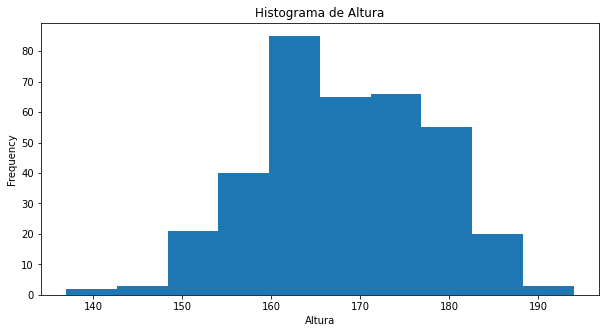

In [238]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Altura")
ax.set_title("Histograma de Altura")
df.altura.plot(kind = 'hist', ax = ax, bins = 10);

O histograma da variável altura está coerente com os valores do boxplot. Nesse caso, temos a mediana em 168 cm. O terceiro quartil está em 175 cm e o primeiro em 161 cm. Ademais, o valor mínimo é 137 cm e o máximo é 194 cm.

Observaremos agora os histogramas diferenciados por sexo.

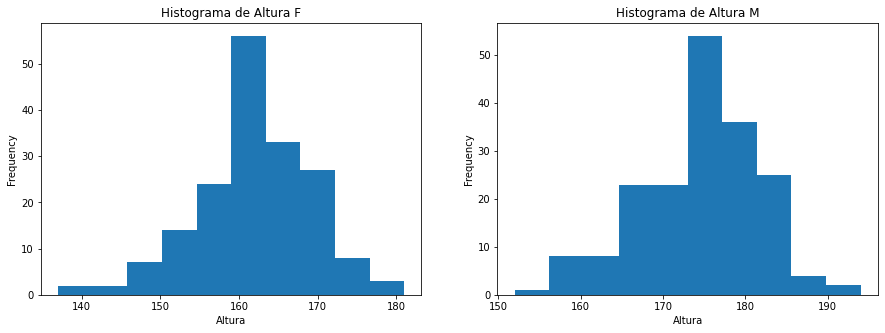

In [239]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_xlabel("Altura")
ax2.set_xlabel("Altura")
ax1.set_title("Histograma de Altura F")
ax2.set_title("Histograma de Altura M")
df.altura.loc[df.sexo == 'F'].plot(kind = 'hist', ax = ax1, bins = 10);
df.altura.loc[df.sexo == 'M'].plot(kind = 'hist', ax = ax2, bins = 10);

### IMC

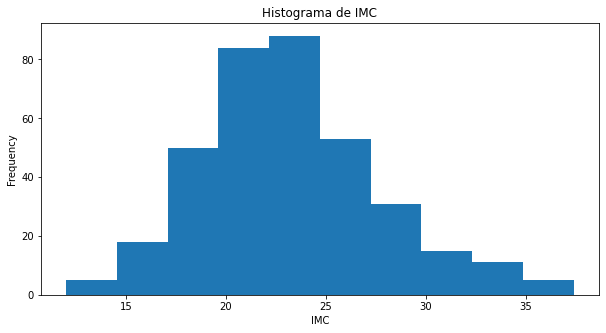

In [240]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("IMC")
ax.set_title("Histograma de IMC")
df.IMC.plot(kind = 'hist', ax = ax, bins = 10);

O histograma da variável IMC está coerente com os valores do boxplot. Nesse caso, temos a mediana em 22.85. O terceiro quartil está em 25.40 e o primeiro em 20.175. Ademais, o valor mínimo é 12 e o máximo é 37.4.

Observaremos agora os histogramas diferenciados por sexo.

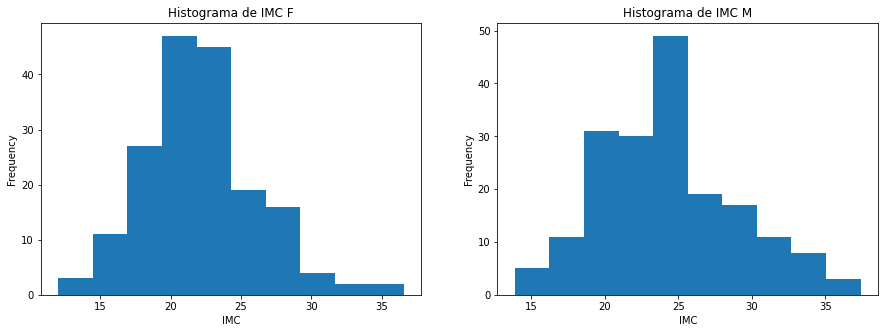

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_xlabel("IMC")
ax2.set_xlabel("IMC")
ax1.set_title("Histograma de IMC F")
ax2.set_title("Histograma de IMC M")
df.IMC.loc[df.sexo == 'F'].plot(kind = 'hist', ax = ax1, bins = 10);
df.IMC.loc[df.sexo == 'M'].plot(kind = 'hist', ax = ax2, bins = 10);

### Obter, para os dados populacionais das variáveis IDADE, PESO, ALTURA e IMC as seguintes medidas:
a) Média aritmética.
b) Mediana, primeiro quartil e terceiro quartil.
c) Variância populacional.
d) Desvio Padrão populacional.
e) Coeficiente de Variação.

### MÉDIA

A média é obtida pela soma de todos os valores dividido pela quantidade de itens. Por exemplo, para calcular a média de idade temos que somar todas as idades do dataframe e dividir pelo número de dados (360).

In [242]:
# exemplo
acumulador = 0
for idade in df.idade:
    acumulador = idade + acumulador
media_idade = acumulador/360

print("A média de idade é: ", media_idade)

A média de idade é:  21.644444444444446


De modo semelhante temos as seguintes médias arredondadas:

In [243]:
# média aritmética
print("Idade: ", round(df.idade.mean(),2))
print("Peso: ", round(df.peso.mean(),2))
print("Altura: ", round(df.altura.mean(),2))
print("IMC: ", round(df.IMC.mean(),2))

Idade:  21.64
Peso:  66.07
Altura:  168.15
IMC:  23.24


### MEDIANA

Para calcular a mediana, temos que primeiro ordenar nosso conjunto de dados.<br>
Se for par, a mediana será {X[(n - 1 )/ 2] + X[(n + 1)/2]}/2 <br>
Se for impar, a mediana será X(n/2) <br>
Nesse caso como 360 é par, teremos como mediana
[X(180) + X(181)] / 2

In [244]:
# ordenada lista
idade_ordenada = df.idade.sort_values(ascending = True, ignore_index = True)
# em python o indíce começa com 0, portanto será 179 + 180
mediana = (idade_ordenada[179] + idade_ordenada[180]) / 2
print("A mediana da idade é: ", mediana)

A mediana da idade é:  21.0


De modo semelhante, temos:

In [245]:
# mediana
print("Idade: ", round(df.idade.median(),2))
print("Peso: ", round(df.peso.median(),2))
print("Altura: ", round(df.altura.median(),2))
print("IMC: ", round(df.IMC.median(),2))

Idade:  21.0
Peso:  64.0
Altura:  168.0
IMC:  22.85


### PRIMEIRO E TERCEIRO QUARTIL

O primeiro quartil pode ser calculado como (N-1)/4 = X(90)<br>
Já o terceiro como [3(N-1)]/4 = X(270)

In [246]:
primeiro_quartil = idade_ordenada[89]
terceiro_quartil = idade_ordenada[269]

print("O primeiro quartil de idade é: ", primeiro_quartil)
print("O terceiro quartil de idade é: ", terceiro_quartil)

O primeiro quartil de idade é:  19
O terceiro quartil de idade é:  24


De modo semelhante, temos:

In [247]:
# primeiro quartil
print("Idade: ", df.idade.quantile(.25))
print("Peso: ", df.peso.quantile(.25))
print("Altura: ", df.altura.quantile(.25))
print("IMC: ", df.IMC.quantile(.25))

Idade:  19.0
Peso:  55.0
Altura:  161.0
IMC:  20.175


In [248]:
# terceiro quartil
print("Idade: ", df.idade.quantile(.75))
print("Peso: ", df.peso.quantile(.75))
print("Altura: ", df.altura.quantile(.75))
print("IMC: ", df.IMC.quantile(.75))

Idade:  24.0
Peso:  74.0
Altura:  175.0
IMC:  25.4


### VARIÂNCIA POPULACIONAL

Variância populacional de uma variável de tipo quantitativo, é o valor médio dos quadrados dos desvios relativamente ao valor médio, dos dados que se obtêm quando se observa essa variável sobre todos os elementos da população, que assumimos finita.

Por exemplo, temos que a média da variável idade é:

In [249]:
media_idade = df.idade.mean()
print("Média da idade", media_idade)

Média da idade 21.644444444444446


Assim, a variância populacional será:

In [250]:
acumulador = 0
for idade in df.idade:
    acumulador = (idade - media_idade)**2 + acumulador
vpop = acumulador/360

print("A variância populacional da idade é: ", vpop)

A variância populacional da idade é:  15.045802469135783


De modo semelhante, temos:

In [251]:
# variância populacional
print("Idade: ", round(std.pvariance(df.idade),2))
print("Peso: ", round(std.pvariance(df.peso),2))
print("Altura: ", round(std.pvariance(df.altura),2))
print("IMC: ", round(std.pvariance(df.IMC),2))

Idade:  15.05
Peso:  225.8
Altura:  91.49
IMC:  19.81


### DESVIO PADRÃO POPULACIONAL

O desvio padrão populacional é a raiz quadrada da variância populacional, no caso exemplo anterior, seria:


In [252]:
dpop = math.sqrt(vpop)
print("O desvio padrão populacional de idade é: ", dpop)

O desvio padrão populacional de idade é:  3.8788919125358188


De modo semelhante, temos:

In [253]:
# desvio padrão populacional
print("Idade: ", round(std.pstdev(df.idade),2))
print("Peso: ", round(std.pstdev(df.peso),2))
print("Altura: ", round(std.pstdev(df.altura),2))
print("IMC: ", round(std.pstdev(df.IMC),2))

Idade:  3.88
Peso:  15.03
Altura:  9.56
IMC:  4.45


### COEFICIENTE DE VARIAÇÃO

É dado pelo desvio padrão população dividido pela média

In [254]:
# coeficiente de variação
print("Idade: ", round(std.pstdev(df.idade)/df.idade.mean() * 100,2))
print("Peso: ", round(std.pstdev(df.peso)/df.peso.mean() * 100,2))
print("Altura: ", round(std.pstdev(df.altura)/df.altura.mean() * 100,2))
print("IMC: ", round(std.pstdev(df.IMC)/df.IMC.mean() * 100,2))

Idade:  17.92
Peso:  22.74
Altura:  5.69
IMC:  19.15


### Sexo Feminino

In [255]:
df_fem = df.loc[df.sexo == 'F']

In [256]:
# ver quantidade de itens
df_fem.shape[0]

176

### Média

In [257]:
# média aritmética
print("Idade: ", round(df_fem.idade.mean(),2))
print("Peso: ", round(df_fem.peso.mean(),2))
print("Altura: ", round(df_fem.altura.mean(),2))
print("IMC: ", round(df_fem.IMC.mean(),2))

Idade:  21.21
Peso:  57.91
Altura:  161.68
IMC:  22.17


### MEDIANA

In [258]:
# mediana
print("Idade: ", round(df_fem.idade.median(),2))
print("Peso: ", round(df_fem.peso.median(),2))
print("Altura: ", round(df_fem.altura.median(),2))
print("IMC: ", round(df_fem.IMC.median(),2))

Idade:  20.0
Peso:  57.0
Altura:  162.0
IMC:  21.85


### PRIMEIRO E TERCEIRO QUARTIL

In [259]:
# primeiro quartil
print("Idade: ", df_fem.idade.quantile(.25))
print("Peso: ", df_fem.peso.quantile(.25))
print("Altura: ", df_fem.altura.quantile(.25))
print("IMC: ", df_fem.IMC.quantile(.25))

Idade:  19.0
Peso:  52.0
Altura:  158.0
IMC:  19.6


In [260]:
# terceiro quartil
print("Idade: ", df_fem.idade.quantile(.75))
print("Peso: ", df_fem.peso.quantile(.75))
print("Altura: ", df_fem.altura.quantile(.75))
print("IMC: ", df_fem.IMC.quantile(.75))

Idade:  24.0
Peso:  64.0
Altura:  166.0
IMC:  24.125


### VARIÂNCIA POPULACIONAL

In [283]:
# variância populacional
print("Idade: ", round(std.pvariance(df_fem.idade),2))
print("Peso: ", round(std.pvariance(df_fem.peso),2))
print("Altura: ", round(std.pvariance(df_fem.altura),2))
print("IMC: ", round(std.pvariance(df_fem.IMC),2))

Idade:  12.83
Peso:  102.28
Altura:  50.69
IMC:  15.99


### DESVIO PADRÃO POPULACIONAL

In [261]:
# desvio padrão populacional
print("Idade: ", round(std.pstdev(df_fem.idade),2))
print("Peso: ", round(std.pstdev(df_fem.peso),2))
print("Altura: ", round(std.pstdev(df_fem.altura),2))
print("IMC: ", round(std.pstdev(df_fem.IMC),2))

Idade:  3.58
Peso:  10.11
Altura:  7.12
IMC:  4.0


### COEFICIENTE DE VARIAÇÃO

In [262]:
# coeficiente de variação
print("Idade: ", round(std.pstdev(df_fem.idade)/df_fem.idade.mean() * 100,2))
print("Peso: ", round(std.pstdev(df_fem.peso)/df_fem.peso.mean() * 100,2))
print("Altura: ", round(std.pstdev(df_fem.altura)/df_fem.altura.mean() * 100,2))
print("IMC: ", round(std.pstdev(df_fem.IMC)/df_fem.IMC.mean() * 100,2))

Idade:  16.88
Peso:  17.46
Altura:  4.4
IMC:  18.04


### Sexo Masculino

In [263]:
df_man = df.loc[df.sexo == 'M']

In [264]:
# verificar quantidade de itens
df_man.shape[0]

184

### MÉDIA

In [265]:
# média aritmética
print("Idade: ", round(df_man.idade.mean(),2))
print("Peso: ", round(df_man.peso.mean(),2))
print("Altura: ", round(df_man.altura.mean(),2))
print("IMC: ", round(df_man.IMC.mean(),2))

Idade:  22.06
Peso:  73.86
Altura:  174.34
IMC:  24.27


### MEDIANA

In [266]:
# mediana
print("Idade: ", round(df_man.idade.median(),2))
print("Peso: ", round(df_man.peso.median(),2))
print("Altura: ", round(df_man.altura.median(),2))
print("IMC: ", round(df_man.IMC.median(),2))

Idade:  21.0
Peso:  72.0
Altura:  175.0
IMC:  23.75


### PRIMEIRO E TERCEIRO QUARTIL

In [267]:
# primeiro quartil
print("Idade: ", df_man.idade.quantile(.25))
print("Peso: ", df_man.peso.quantile(.25))
print("Altura: ", df_man.altura.quantile(.25))
print("IMC: ", df_man.IMC.quantile(.25))

Idade:  19.0
Peso:  63.0
Altura:  169.75
IMC:  20.9


In [268]:
# terceiro quartil
print("Idade: ", df_man.idade.quantile(.75))
print("Peso: ", df_man.peso.quantile(.75))
print("Altura: ", df_man.altura.quantile(.75))
print("IMC: ", df_man.IMC.quantile(.75))

Idade:  25.0
Peso:  83.0
Altura:  180.0
IMC:  26.9


### VARIÂNCIA POPULACIONAL

In [284]:
# variância populacional
print("Idade: ", round(std.pvariance(df_man.idade),2))
print("Peso: ", round(std.pvariance(df_man.peso),2))
print("Altura: ", round(std.pvariance(df_man.altura),2))
print("IMC: ", round(std.pvariance(df_man.IMC),2))

Idade:  16.82
Peso:  219.58
Altura:  52.21
IMC:  21.31


### DESVIO PADRÃO POPULACIONAL

In [269]:
# desvio padrão populacional
print("Idade: ", round(std.pstdev(df_man.idade),2))
print("Peso: ", round(std.pstdev(df_man.peso),2))
print("Altura: ", round(std.pstdev(df_man.altura),2))
print("IMC: ", round(std.pstdev(df_man.IMC),2))

Idade:  4.1
Peso:  14.82
Altura:  7.23
IMC:  4.62


### COEFICIENTE DE VARIAÇÃO

In [270]:
# coeficiente de variação
print("Idade: ", round(std.pstdev(df_man.idade)/df_man.idade.mean() * 100,2))
print("Peso: ", round(std.pstdev(df_man.peso)/df_man.peso.mean() * 100,2))
print("Altura: ", round(std.pstdev(df_man.altura)/df_man.altura.mean() * 100,2))
print("IMC: ", round(std.pstdev(df_man.IMC)/df_man.IMC.mean() * 100,2))

Idade:  18.59
Peso:  20.06
Altura:  4.14
IMC:  19.02


### Calcular, para os dados populacionais das variáveis quantitativas (IDADE, PESO, ALTURA e IMC), as medidas de posição e de dispersão, por IES.

### UFAC

In [271]:
df_ufac = df.loc[df.IES == 'UFAC']

In [272]:
# ver quantidade de itens
df_ufac.shape[0]

140

### MÉDIA

In [273]:
# média aritmética
print("Idade: ", round(df_ufac.idade.mean(),2))
print("Peso: ", round(df_ufac.peso.mean(),2))
print("Altura: ", round(df_ufac.altura.mean(),2))
print("IMC: ", round(df_ufac.IMC.mean(),2))

Idade:  21.4
Peso:  66.15
Altura:  168.36
IMC:  23.17


### MEDIANA

In [274]:
# mediana
print("Idade: ", round(df_ufac.idade.median(),2))
print("Peso: ", round(df_ufac.peso.median(),2))
print("Altura: ", round(df_ufac.altura.median(),2))
print("IMC: ", round(df_ufac.IMC.median(),2))

Idade:  20.0
Peso:  64.0
Altura:  168.0
IMC:  22.9


### PRIMEIRO E TERCEIRO QUARTIL

In [275]:
# primeiro quartil
print("Idade: ", df_ufac.idade.quantile(.25))
print("Peso: ", df_ufac.peso.quantile(.25))
print("Altura: ", df_ufac.altura.quantile(.25))
print("IMC: ", df_ufac.IMC.quantile(.25))

Idade:  18.0
Peso:  55.0
Altura:  162.0
IMC:  20.7


In [276]:
# terceiro quartil
print("Idade: ", df_ufac.idade.quantile(.75))
print("Peso: ", df_ufac.peso.quantile(.75))
print("Altura: ", df_ufac.altura.quantile(.75))
print("IMC: ", df_ufac.IMC.quantile(.75))

Idade:  23.0
Peso:  75.0
Altura:  175.0
IMC:  25.1


### VARIÂNCIA POPULACIONAL

In [285]:
# variância populacional
print("Idade: ", round(std.pvariance(df_ufac.idade),2))
print("Peso: ", round(std.pvariance(df_ufac.peso),2))
print("Altura: ", round(std.pvariance(df_ufac.altura),2))
print("IMC: ", round(std.pvariance(df_ufac.IMC),2))

Idade:  19.34
Peso:  200.56
Altura:  88.83
IMC:  13.13


### DESVIO PADRÃO POPULACIONAL

In [277]:
# desvio padrão populacional
print("Idade: ", round(std.pstdev(df_ufac.idade),2))
print("Peso: ", round(std.pstdev(df_ufac.peso),2))
print("Altura: ", round(std.pstdev(df_ufac.altura),2))
print("IMC: ", round(std.pstdev(df_ufac.IMC),2))

Idade:  4.4
Peso:  14.16
Altura:  9.43
IMC:  3.62


### COEFICIENTE DE VARIAÇÃO

In [278]:
# coeficiente de variação
print("Idade: ", round(std.pstdev(df_ufac.idade)/df_ufac.idade.mean() * 100,2))
print("Peso: ", round(std.pstdev(df_ufac.peso)/df_ufac.peso.mean() * 100,2))
print("Altura: ", round(std.pstdev(df_ufac.altura)/df_ufac.altura.mean() * 100,2))
print("IMC: ", round(std.pstdev(df_ufac.IMC)/df_ufac.IMC.mean() * 100,2))

Idade:  20.55
Peso:  21.41
Altura:  5.6
IMC:  15.64


### UFSCAR

In [111]:
df_ufscar = df.loc[df.IES == 'UFSCAR']

In [112]:
# ver quantidade de itens
df_ufscar.shape[0]

220

### MÉDIA

In [113]:
# média aritmética
print("Idade: ", round(df_ufscar.idade.mean(),2))
print("Peso: ", round(df_ufscar.peso.mean(),2))
print("Altura: ", round(df_ufscar.altura.mean(),2))
print("IMC: ", round(df_ufscar.IMC.mean(),2))

Idade:  21.8
Peso:  66.01
Altura:  168.01
IMC:  23.29


### MEDIANA

In [114]:
# mediana
print("Idade: ", round(df_ufscar.idade.median(),2))
print("Peso: ", round(df_ufscar.peso.median(),2))
print("Altura: ", round(df_ufscar.altura.median(),2))
print("IMC: ", round(df_ufscar.IMC.median(),2))

Idade:  21.0
Peso:  63.0
Altura:  168.0
IMC:  22.75


### PRIMEIRO E TERCEIRO QUARTIL

In [279]:
# primeiro quartil
print("Idade: ", df_ufscar.idade.quantile(.25))
print("Peso: ", df_ufscar.peso.quantile(.25))
print("Altura: ", df_ufscar.altura.quantile(.25))
print("IMC: ", df_ufscar.IMC.quantile(.25))

Idade:  19.75
Peso:  55.75
Altura:  160.0
IMC:  20.075000000000003


In [280]:
# terceiro quartil
print("Idade: ", df_ufscar.idade.quantile(.75))
print("Peso: ", df_ufscar.peso.quantile(.75))
print("Altura: ", df_ufscar.altura.quantile(.75))
print("IMC: ", df_ufscar.IMC.quantile(.75))

Idade:  25.0
Peso:  74.0
Altura:  175.0
IMC:  25.95


### VARIÂNCIA POPULACIONAL

In [286]:
# variância populacional
print("Idade: ", round(std.pvariance(df_ufscar.idade),2))
print("Peso: ", round(std.pvariance(df_ufscar.peso),2))
print("Altura: ", round(std.pvariance(df_ufscar.altura),2))
print("IMC: ", round(std.pvariance(df_ufscar.IMC),2))

Idade:  12.25
Peso:  241.86
Altura:  93.13
IMC:  24.05


### DESVIO PADRÃO POPULACIONAL

In [281]:
# desvio padrão populacional
print("Idade: ", round(std.pstdev(df_ufscar.idade),2))
print("Peso: ", round(std.pstdev(df_ufscar.peso),2))
print("Altura: ", round(std.pstdev(df_ufscar.altura),2))
print("IMC: ", round(std.pstdev(df_ufscar.IMC),2))

Idade:  3.5
Peso:  15.55
Altura:  9.65
IMC:  4.9


### COEFICIENTE DE VARIAÇÃO

In [282]:
# coeficiente de variação
print("Idade: ", round(std.pstdev(df_ufscar.idade)/df_ufscar.idade.mean() * 100,2))
print("Peso: ", round(std.pstdev(df_ufscar.peso)/df_ufscar.peso.mean() * 100,2))
print("Altura: ", round(std.pstdev(df_ufscar.altura)/df_ufscar.altura.mean() * 100,2))
print("IMC: ", round(std.pstdev(df_ufscar.IMC)/df_ufscar.IMC.mean() * 100,2))

Idade:  16.06
Peso:  23.56
Altura:  5.74
IMC:  21.06
